## Summary: Models of Single Populations

### **Density-Dependent Growth**
- **Realistic population growth**: Populations can't grow exponentially indefinitely due to limited resources or competition. Over time, they stabilize at a certain limit.
- **Carrying capacity (K)**: The maximum population size an environment can sustain, where the birth rate equals the death rate.

### **Modeling Resource Limitations**
- As the population grows, competition for limited resources increases.
- The per-capita death rate is modeled as a function of the population size:
  - **Natural death rate**: Constant rate (α).
  - **Additional deaths**: Linearly dependent on population size \( $ \gamma$ * X \), representing competition.

### **Formulating the Differential Equation**
- The population growth model becomes:
  
  $$
  \frac{dX}{dt} = rX - \gamma X^2
  $$

where:
  - $r = \beta - \alpha$ (reproduction rate)
  - $\gamma$ (extra death rate due to crowding)


### **Logistic Equation**
- Rewriting the differential equation leads to the **logistic growth model**:
  
  $$
  \frac{dX}{dt} = rX \left(1 - \frac{X}{K}\right)
  $$
  
- This equation shows that population growth slows down as it approaches the carrying capacity \(K\).


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

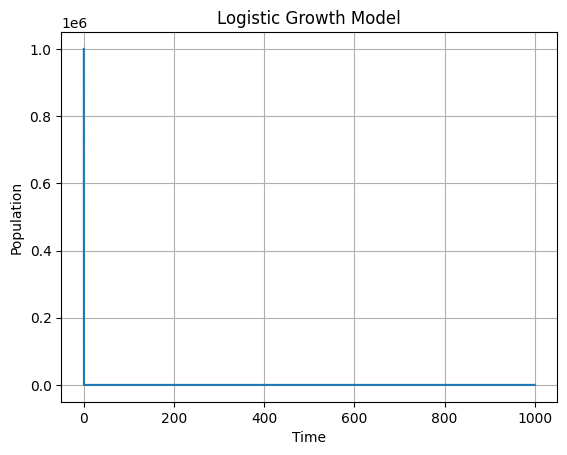

In [14]:
# Initial parameters
birthrate = 1.2
deathrate = 0.3
deathrateCrowding = 0.3
initialPopulation = 1_000_000
carryingCapacity = ((birthrate - deathrate) / deathrateCrowding) * initialPopulation
growthRate = birthrate - deathrate
time_span = [0, 1000]
step_size = 0.01

# Logistic growth model
def logisticGrowth(t, population, birthrate, deathrate, deathrateCrowding):
    return (birthrate - deathrate) * population - deathrateCrowding * population**2

# Solve the logistic growth equation
solution = solve_ivp(
    fun=lambda t, population: logisticGrowth(t, population, birthrate, deathrate, deathrateCrowding),
    t_span=time_span,
    y0=[initialPopulation],
    t_eval=np.arange(time_span[0], time_span[1], step_size)
)

# Plot the solution
fig, ax = plt.subplots()
ax.plot(solution.t, solution.y[0])
ax.set(xlabel='Time', ylabel='Population', title='Logistic Growth Model')
ax.grid()
plt.show()


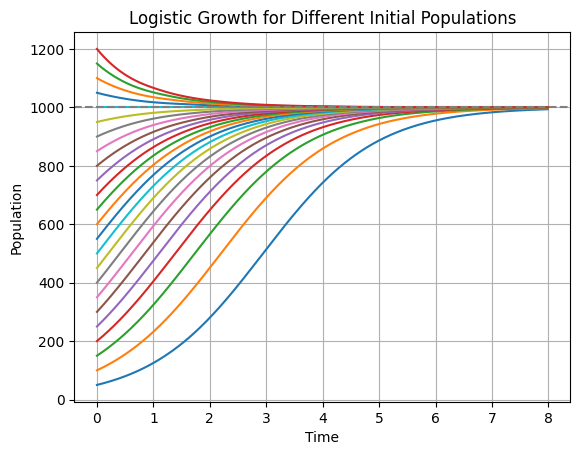

In [29]:
# Parameters from the Maple code
r = 1  # Growth rate
K = 1000  # Carrying capacity
time_span = [0, 8]  # Time range, same as Maple (0 to 8)
step_size = 0.01  # Step size for smoother graph

# Logistic growth model based on the equation
def logisticGrowth(t, population, r, K):
    return r * population * (1 - population / K)

# Function to solve logistic equation for different initial populations
def solve_for_population(initial_population):
    solution = solve_ivp(
        fun=lambda t, population: logisticGrowth(t, population, r, K),
        t_span=time_span,
        y0=[initial_population],
        t_eval=np.arange(time_span[0], time_span[1], step_size)
    )
    return solution

# Plot multiple solutions for different initial populations
fig, ax = plt.subplots()

# Loop over initial populations and solve/logistic plot
for i in range(1, 25):
    initial_population = i * 50  # Increment initial population by 50 each time
    solution = solve_for_population(initial_population)
    ax.plot(solution.t, solution.y[0], label=f"Initial Pop = {initial_population}")

# Plot the carrying capacity as a horizontal line
ax.axhline(y=K, color='gray', linestyle='--', label=f"Carrying Capacity = {K}")

# Add labels and title
ax.set(xlabel='Time', ylabel='Population', title='Logistic Growth for Different Initial Populations')

# Add a legend
#ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Show the plot
ax.grid()
plt.show()
